# Scikit-learn을 이용한 Iris(붓꽃) 데이터 분류
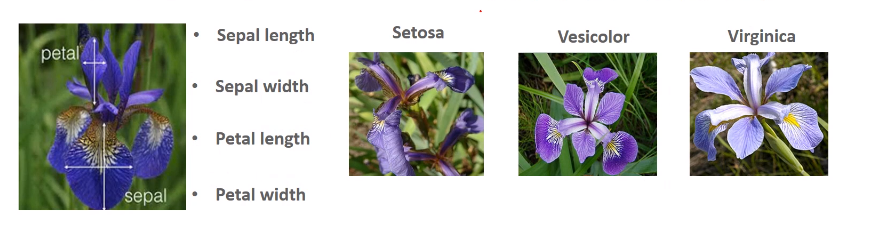

## 용어 정리

- 피처(Feature):
 속성을 뜻함.
 
- 레이블, 클래스, 타겟(값), 결정(값):
 모두 같은 뜻임.
 지도 학습 시 데이터의 학습을 위해 주어지는 정답 데이터.
 지도 학습 중 분류의 경우에는 이 결정값을 레이블 또는 클래스로 지칭.
 

## 프로세스

 1. 데이터 세트 분리 (데이터를 학습 데이터와 테스트 데이터로 분리합니다)
 2. 모델 학습
 3. 예측 수행
 4. 평가

In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


**붓꽃 예측을 위한 사이킷런 필요 모듈 로딩**

In [3]:
# 붓꽃(Iris) 데이터를 load
from sklearn.datasets import load_iris

In [4]:
# 결정트리 알고리즘
from sklearn.tree import DecisionTreeClassifier

In [6]:
# 훈련 세트, 테스트(valid) 세트를 구분하기 위해
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd

In [15]:
# iris data load
iris = load_iris()

# get iris's features array
iris_data = iris.data

print('iris data type: ', type(iris_data))
print('iris data size: ', len(iris_data))

# get iris target data
iris_label = iris.target
print('iris target values: ', iris_label)
print('iris target name: ', iris.target_names)

# convert DataFrame
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris data type:  <class 'numpy.ndarray'>
iris data size:  150
iris target values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name:  ['setosa' 'versicolor' 'virginica']


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   label  
0      0  
1      0  
2      0

**학습 데이터와 테스트 데이터 세트로 분리**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=1)

**학습 데이터 세트로 학습(train) 수행**

In [18]:
# DecisionTreeClassfier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

**테스트 데이터 세트로 예측(Predict) 수행**

In [20]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = df_clf.predict(X_test)

In [21]:
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

**예측 정확도 평가**

In [22]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:  0.9667
